
Versión estocástica modelo SIS (Susceptibles-Infectados-Susceptibles) considera el proceso de infección como una cadena de Markov, donde $I_{N(t)}$ representa el número de infectados para el tiempo t de una población cerrada de $N$ individuos. $S_{N(t)}=N-I_{N(t)}$ será el número de susceptibles para ese mismo tiempo.

Representando la cadena con las tasas de transición $$q(i,j)=\begin{cases} \lambda \frac{(N-i)i}{N} &\text{si } j=i+1\\ \mu i & \text{si } j=i-1 \end{cases}$$
Donde $\lambda$ es la tasa de infección y $\mu$ es la tasa de recuperación.

**Problema 1**
El sentido de las tasas está sujeto a las simplificaciones que estemos dispuestos a aceptar. La recuperación a tasa constante puede tener sentido en muchos escenarios epidiemológicos. Adicionalmente, la tasa de infección toma en consideración y será proporcional tanto al número $i$ de infectados, como al número de susceptibles $N-i$.

**Problema 2**
Como derivamos en clase, la medida estacionaria para un proceso de nacimiento y muerte será dada por la fórmula para la medida del primer estado $\pi_0$ y para los sucesivos $\pi_k$  $$\pi_0=\frac{1}{1+\sum_{n=1}^{N}{\frac{\lambda_0 \cdot...\cdot \lambda_{n-1}}{  \mu_{0} \cdot...\cdot \mu_n }}}$$ 

$$\pi_k=\frac{\lambda_{k-1}\pi_{k-1}}{\mu_{k}}=\frac{\lambda_0\cdot...\cdot\lambda_{k-1}\pi_0}{\mu_0\cdot...\cdot\mu_{k}}=\frac{\lambda_0...\lambda_{k-1}}{\mu_0\cdot...\cdot\mu_{k}(1+\sum_{n=1}^{N}{\frac{\lambda_0 \cdot...\cdot \lambda_{n-1}}{  \mu_{0} \cdot...\cdot \mu_n }})}$$

Donde $\lambda_i$ es la tasa $q(i,j)$ Como consideramos estados desde $1$ y los $lambda_i

**Problema 3**

Simular con $\frac{\lambda}{\mu}=0.5$, $\frac{\lambda}{\mu}=1$, $\frac{\lambda}{\mu}=2$
Tomando a $\lambda_i=\sum_{i\neq j}{q(i,j)}$, simulo el vector $v_t$ de tiempos de salto como exponenciales de tasa $\lambda_i$ y el vector de estados $s$ con probabilidad de pasar a j cuando se abandona el estado i 

$$r(i,j)=\frac{q(i,j)}{\lambda_i}=\begin{cases} \frac{1}{\lambda_i}\lambda \frac{(N-i)i}{N} &\text{si } j=i+1\\ \frac{1}{\lambda_i}\mu i & \text{si } j=i-1 \end{cases}$$

Donde $\lambda_i=(\lambda \frac{(N-i)}{N}+\mu)i$. Como sólo me indican las razones entre $\lambda$ y $\mu$ tomaré siempre $\mu=1$.

Como resultado de las simulaciones se observan dos comportamientos. En primer lugar el estimado de tiempo de colapso al estado $I_{N(t)}=0$ no depende exclusivamente de la razón entre $\lambda$ y $\mu$. Con valores $\mu=2$ y $\lambda=1$ el promedio de tiempos es diferente ($\bar{t}=2.22$) a $\lambda=0.5$ y $\mu=1$ ($\bar{t}=4.29$) o $\lambda=4$ y $\mu=8$ ($\bar{t}=0.58$). Fijando $\mu=1$, con $\frac{\lambda}{\mu}=1$ el tiempo medio de colapso al estado $0$ se estima puntualmente como $13.07$. En cambio con $\frac{\lambda}{\mu}=2$ la cadena no colapsa al estado 0 (se simularon hasta 10000 saltos).

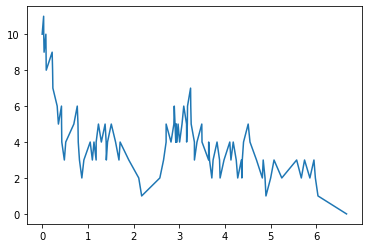

107
71.94244396525494


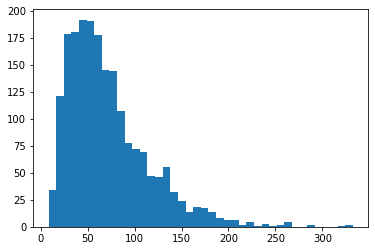

In [124]:
#Guía de uso de librería fitter en: https://onezero.blog/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library/
import numpy as np
import math as m
#from fitter import Fitter, get_common_distributions
#get_common_distributions()
import matplotlib.pyplot as plt

def bern_try(p):
    u=np.random.uniform()
    return u<=p 


def simulador_SIS(lam,mu=1,inicial=10,N=100,iter_max=1000):
    """"
    Parámetros:
    lam: tasa lambda que es factor de la tasa de incremento
    mu: tasa mu que es factor de la tasa de decaimiento. Por defecto =100
    N: tamaño de la población. Por defecto=100
    inicial: cantidad de infectados en la que se inicia la simulación. No puede ser 0 ni N. Por defecto=10
    
    Retorna el vector v_t de tiempos y el vector de estados simulados."""
    #q_incr=lambda i,lam,mu,N:(lam/N)*(N-i)*i/((lam*(N-i)/N+mu)*i)
    lam_i=lambda i,lam,mu,N:(lam*(N-i)/N+mu)*i
    r_decr=lambda i,lam,mu,N:(mu*i)/((lam*(N-i)/N+mu)*i) 
    v_t=[0]#Vector de tiempos
    estados=[inicial] #Vector de estados simulados
    i=inicial
    
    for iter in range(iter_max):
        if i==0:
            break
        #print(lam_i(i,lam,mu,N),r_decr(i,lam,mu,N),i)
        t_i=np.random.exponential(1/lam_i(i,lam,mu,N)) #Recibe como parámetro 1/tasa
        v_t.append(v_t[-1]+t_i)
        # if i==N:
        #     estados.append(N-1)
        #     i-=1
        #     continue
        descenso=bern_try(r_decr(i,lam,mu,N))#Cuando i=N r_decr=1 (probabilidad 1 de descender)
        #print(descenso)
        i=i-1 if descenso else i+1 
        estados.append(i)
    
    return v_t,estados
##Punto 3
lam=2
v_t,est=simulador_SIS(lam,mu=2,iter_max=10000)
plt.plot(v_t,est)
plt.show()
print(len(v_t))


##Punto 4
lam=0.08

iter=2000
tiempos=[]
for i in range(iter):
    tiemp_sim,est=simulador_SIS(lam,mu=0.1)
    tiempos.append(tiemp_sim[-1])
    
print(np.mean(tiempos))
##Punto 5
plt.hist(tiempos,bins=40)
plt.show()

# f = Fitter(tiempos)
# f.fit()
# # may take some time since by default, all distributions are tried
# # but you call manually provide a smaller set of distributions
# f.summary()


In [ ]:
from fitter import Fitter, get_common_distributions
get_common_distributions()